## **🧩 Problem Statement**
The challenge is to create a machine learning model. This model will learn from health-related data (features) of women and then predict whether they have a specific type of diabetes, such as Type 2 or gestational diabetes.

## **🛠️ Setting Up the Environment**
Before we start, we need to make sure we have all the tools (libraries) we need.

Installing Libraries
We first install or upgrade two important libraries:

* scikit-learn: A fundamental library for machine learning in Python.

* pycaret: A low-code machine learning library that helps speed up the experiment cycle.

In [ ]:
!pip install --upgrade scikit-learn


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 132.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.

#📦 **Importing Libraries**

Next, we import all the necessary libraries into our notebook. These libraries help us with tasks like:

* Handling data (pandas, numpy)
* Creating visualizations (matplotlib.pyplot, seaborn)
* Preparing data for the model (KNNImputer, OneHotEncoder, MinMaxScaler, ColumnTransformer, train_test_split, Pipeline, LabelEncoder)
* Building and evaluating models (SVC, LogisticRegression, RandomForestClassifier, DecisionTreeClassifier, accuracy_score, classification_report)
* Using PyCaret for automated ML (pycaret.classification)
*Ignoring unnecessary warnings (warnings)

In [ ]:
# 📦 Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")


#📂 **Loading and Understanding the Data**

Start by loading the datasets. The are three files:

* Train.csv: Contains the training data, including features and the target variable (diabetes type).
* Test.csv: Contains the test data, which has the same features but not the target variable. We'll use this to make our final predictions.
* SampleSubmission.csv: Shows the format we need for our submission file.

In [ ]:
# 📂 Load the dataset (update the path as needed)
df = pd.read_csv("/content/SheCures/Train.csv")
ts = pd.read_csv("/content/SheCures/Test.csv")
ss = pd.read_csv("/content/SheCures/SampleSubmission.csv")
df.head()


,Genetic Markers,Family History,Insulin Levels,Blood Glucose Levels,Glucose Tolerance Test,BMI,Waist Circumference,Physical Activity,Dietary Habits,Smoking Status,...,Blood Pressure,Cholesterol Levels,Liver Function Tests,Previous Gestational Diabetes,Pregnancy History,Weight Gain During Pregnancy,Ethnicity,Socioeconomic Factors,Target,ID
0,Negative,No,33,147,Abnormal,29,34,Moderate,Healthy,Non-Smoker,...,125,207,Normal,No,Complications,28,Low Risk,Low,Type 2 Diabetes,ID_0000ff
1,Negative,Yes,20,118,Normal,24,35,High,Unhealthy,Non-Smoker,...,121,210,Normal,Yes,Complications,15,High Risk,Medium,Prediabetic,ID_000372
2,Negative,Yes,14,142,Abnormal,22,30,Low,Healthy,Non-Smoker,...,90,167,Normal,Yes,Complications,13,Low Risk,Low,Type 1 Diabetes,ID_0005b8
3,Negative,Yes,38,141,Abnormal,27,34,High,Healthy,Smoker,...,119,219,Normal,No,Normal,25,Low Risk,High,Type 2 Diabetes,ID_000f18
4,Positive,Yes,20,120,Abnormal,24,36,Low,Unhealthy,Smoker,...,120,223,Normal,Yes,Complications,10,Low Risk,Medium,Gestational Diabetes,ID_0011f6


**Getting to Know the Data**

* df.columns: See the names of all the columns

* df.info(): Get a summary, including the number of entries, column names, data types, and non-null counts. This helps identify missing values.

* df.describe():  Look at basic statistics (count, mean, standard deviation, min, max, etc.) for numerical columns.

* Class Distribution: Check how many samples belong to each diabetes type (our target). This helps us see if the dataset is balanced.

* Correlation: Visualize how numerical features relate to each other using a heatmap. This can help identify potentially important features or relationships.

In [ ]:
df.columns

Index(['Genetic Markers', 'Family History', 'Insulin Levels',
       'Blood Glucose Levels', 'Glucose Tolerance Test', 'BMI',
       'Waist Circumference', 'Physical Activity', 'Dietary Habits',
       'Smoking Status', 'Alcohol Consumption', 'Blood Pressure',
       'Cholesterol Levels', 'Liver Function Tests',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Ethnicity', 'Socioeconomic Factors',
       'Target', 'ID'],
      dtype='object')

In [ ]:
# ℹ️ Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15094 entries, 0 to 15093
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Genetic Markers                15094 non-null  object
 1   Family History                 15094 non-null  object
 2   Insulin Levels                 15094 non-null  int64 
 3   Blood Glucose Levels           15094 non-null  int64 
 4   Glucose Tolerance Test         15094 non-null  object
 5   BMI                            15094 non-null  int64 
 6   Waist Circumference            15094 non-null  int64 
 7   Physical Activity              15094 non-null  object
 8   Dietary Habits                 15094 non-null  object
 9   Smoking Status                 15094 non-null  object
 10  Alcohol Consumption            15094 non-null  object
 11  Blood Pressure                 15094 non-null  int64 
 12  Cholesterol Levels             15094 non-null  int64 
 13  L

In [ ]:
# 📊 Basic statistics
df.describe()

,Insulin Levels,Blood Glucose Levels,BMI,Waist Circumference,Blood Pressure,Cholesterol Levels,Weight Gain During Pregnancy
count,15094.000000,15094.000000,15094.000000,15094.000000,15094.000000,15094.000000,15094.000000
mean,20.145952,128.760302,26.078309,35.738174,117.043328,208.352458,20.120578
std,9.633169,25.548681,5.607679,5.041412,12.844156,34.766744,7.616550
min,5.000000,90.000000,15.000000,28.000000,90.000000,150.000000,5.000000
25%,13.000000,110.000000,22.000000,32.000000,109.000000,182.000000,15.000000
50%,18.000000,122.000000,26.000000,35.000000,117.000000,204.000000,20.000000
75%,25.000000,141.000000,30.000000,39.000000,125.000000,230.000000,25.000000
max,49.000000,199.000000,39.000000,49.000000,149.000000,299.000000,39.000000


In [ ]:
# 🧮 Class distribution
diabetes_type = "Target"
df[diabetes_type].value_counts()


,count
Target,
Type 1 Diabetes,3825
Type 2 Diabetes,3795
Prediabetic,3752
Gestational Diabetes,3722


<Axes: >

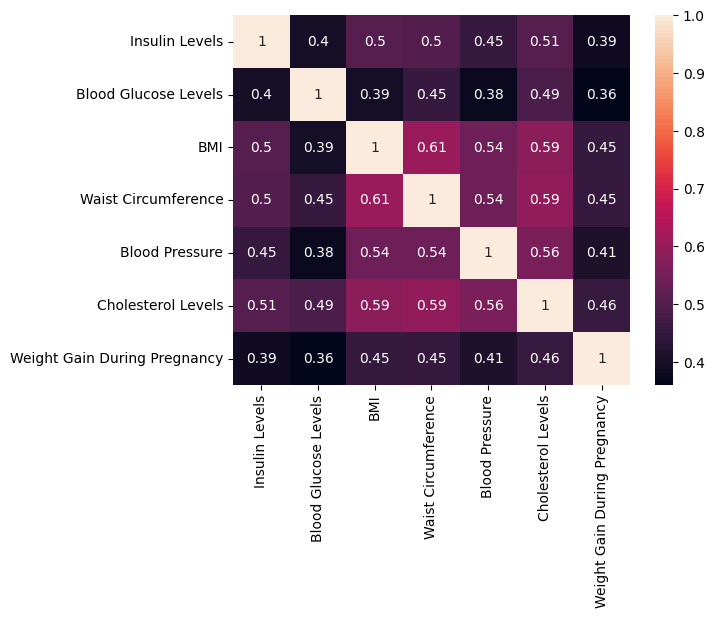

In [ ]:
# 🔍 Correlation heatmap
sns.heatmap(df.corr(numeric_only = True),annot = True)

# ⚙️ **Data Preprocessing**

Since machine learning models usually require data to be in a specific format, this section covers cleaning and preparing the data.

**Identifying Features**

Here I separate the features (the inputs for the model) from the target variable (what I want to predict). I also identify which features are numerical (like age or glucose level) and which are categorical (like 'Yes'/'No' or a specific group).

In [ ]:
target = "Target"
features = df.drop(columns=[target])

num_features = features.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = features.select_dtypes(include=["object", "category"]).columns.tolist()

**Creating Preprocessing Pipelines**

Here I build "pipelines" to handle numerical and categorical features separately and consistently.

**Numerical Pipeline:**

* *KNNImputer*: Fills in missing numerical values using the K-Nearest Neighbors method.

* *MinMaxScaler*: Scales numerical features to a range between 0 and 1. This helps many models perform better.

**Categorical Pipeline**:

* *OneHotEncoder*: Converts categorical text data into numerical format (0s and 1s) so the model can understand it.

Finally, I then combine the numerical and categorical pipelines using *ColumnTransformer*.

In [ ]:
# Define preprocessing pipelines
num_transformer = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5)),
    ("scaler", MinMaxScaler())
])

cat_transformer = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

**Splitting the Data**

At this stage, it's crucial to split the training data before applying some preprocessing steps to avoid "data leakage" (where information from the test set accidentally influences the training process). The split is training set (80%) and a testing set (20%).

In [ ]:
# Split data before preprocessing to avoid data leakage
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df.drop(columns=[target]), df[target], test_size=0.2, random_state=42)

In [ ]:
# Encode categorical variables and split features/target as needed
df_cleaned = preprocessor.fit_transform(df.drop(columns=[target])) # Drop target column before preprocessing
new_columns = (
    num_features +
    list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_features))
)


**Applying Preprocessing**

Now I applied the preprocessor to both the training and testing sets. This imputed missing values, scaled numbers and one-hot encoded categories.

In [ ]:
# Fit and transform training and test data
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

In [ ]:
# Extract the names of the new columns created by one-hot encoding
encoded_cat_columns = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_features)
new_columns = num_features + list(encoded_cat_columns)


##🤖 **Building Models with PyCaret**

PyCaret simplifies the process of training and comparing many different machine learning models.

**Setting Up PyCaret**

Here I initialized the PyCaret environment. I provided the training data (before our manual preprocessing, as PyCaret can handle it), specified the target column, and set some parameters. I dropped the 'ID' column as it's not a feature.

In [ ]:
df_pycaret = df.drop(columns=["ID"])

In [ ]:
# Set up PyCaret
from pycaret.classification import *

classf = setup(data = df_pycaret, target = 'Target', train_size = 0.8,
               normalize = True, session_id = 123)

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Multiclass
3,Target mapping,"Gestational Diabetes: 0, Prediabetic: 1, Type 1 Diabetes: 2, Type 2 Diabetes: 3"
4,Original data shape,"(15094, 20)"
5,Transformed data shape,"(15094, 26)"
6,Transformed train set shape,"(12075, 26)"
7,Transformed test set shape,"(3019, 26)"
8,Numeric features,7
9,Categorical features,12


**Comparing Models**

PyCaret can automatically train and evaluate several common classification models and show us which one performs best based on standard metrics.

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9815,0.9941,0.9815,0.9824,0.9815,0.9754,0.9757,1.1020
gbc,Gradient Boosting Classifier,0.9815,0.0000,0.9815,0.9824,0.9814,0.9754,0.9757,5.5120
lightgbm,Light Gradient Boosting Machine,0.9814,0.9946,0.9814,0.9822,0.9813,0.9752,0.9755,2.4930
xgboost,Extreme Gradient Boosting,0.9800,0.9943,0.9800,0.9807,0.9799,0.9733,0.9736,0.7990
et,Extra Trees Classifier,0.9623,0.9938,0.9623,0.9654,0.9619,0.9498,0.9510,1.2860
dt,Decision Tree Classifier,0.9599,0.9733,0.9599,0.9602,0.9600,0.9466,0.9466,0.2650
nb,Naive Bayes,0.9477,0.9907,0.9477,0.9487,0.9472,0.9303,0.9310,0.2340
ada,Ada Boost Classifier,0.8565,0.0000,0.8565,0.8701,0.8568,0.8087,0.8131,0.5880
qda,Quadratic Discriminant Analysis,0.8292,0.0000,0.8292,0.8377,0.8297,0.7722,0.7746,0.2370
lr,Logistic Regression,0.8229,0.0000,0.8229,0.8214,0.8218,0.7638,0.7641,1.0220


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**Creating a Specific Model**

Based on the compare_models() results, I created a specific model. Here, I chose Random Forest ('rf') based on the F1 Score.

In [ ]:
model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9793,0.9934,0.9793,0.9804,0.9792,0.9724,0.9728
1,0.9768,0.9911,0.9768,0.9782,0.9767,0.9691,0.9696
2,0.9818,0.9946,0.9818,0.9822,0.9817,0.9757,0.9759
3,0.9884,0.9957,0.9884,0.9887,0.9884,0.9845,0.9847
4,0.9826,0.9946,0.9826,0.9834,0.9826,0.9768,0.9771
5,0.9826,0.9946,0.9826,0.9834,0.9825,0.9768,0.9771
6,0.9801,0.9944,0.9801,0.9807,0.9800,0.9735,0.9737
7,0.9876,0.9962,0.9876,0.9880,0.9876,0.9834,0.9836
8,0.9768,0.9921,0.9768,0.9782,0.9767,0.9691,0.9696


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## 📊 **Evaluating the Model**

I needed to see how well my chosen model performs, especially on data it hasn't seen before.

**Classification Report**

Here I used the manually split test set (X_test_raw and y_test) to evaluate the PyCaret model. The classification_report gives us precision, recall, and F1-score for each class. **Note**:  Prediction is done on X_test_raw because PyCaret models expect data in the original format and handle preprocessing internally.

In [ ]:
# Print the f1 score of the model

print(classification_report(y_test, predict_model(model, data=X_test_raw)["prediction_label"]))


                      precision    recall  f1-score   support

Gestational Diabetes       1.00      0.99      1.00       765
         Prediabetic       0.99      1.00      1.00       751
     Type 1 Diabetes       1.00      1.00      1.00       779
     Type 2 Diabetes       1.00      1.00      1.00       724

            accuracy                           1.00      3019
           macro avg       1.00      1.00      1.00      3019
        weighted avg       1.00      1.00      1.00      3019



**Visualizations**

PyCaret provides easy ways to visualize model performance:

* *Confusion Matrix*: Shows how many predictions were correct and where the model made mistakes.
* *Feature Importance*: Shows which features the model found most important for making predictions.

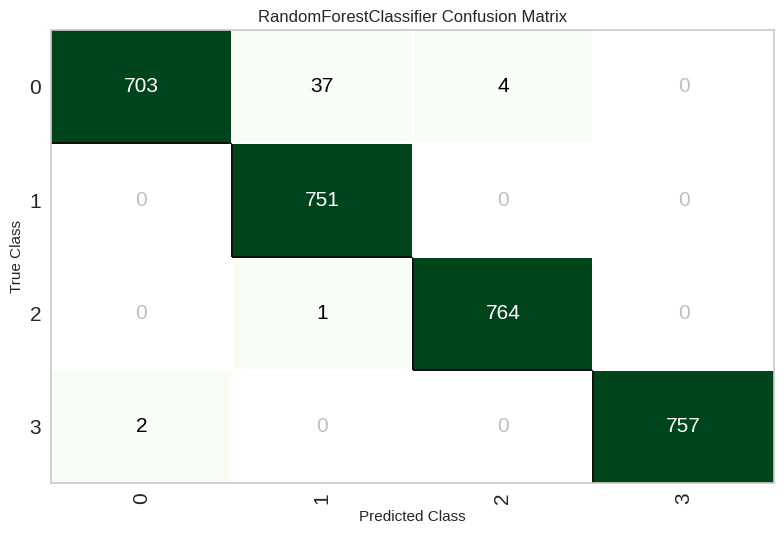

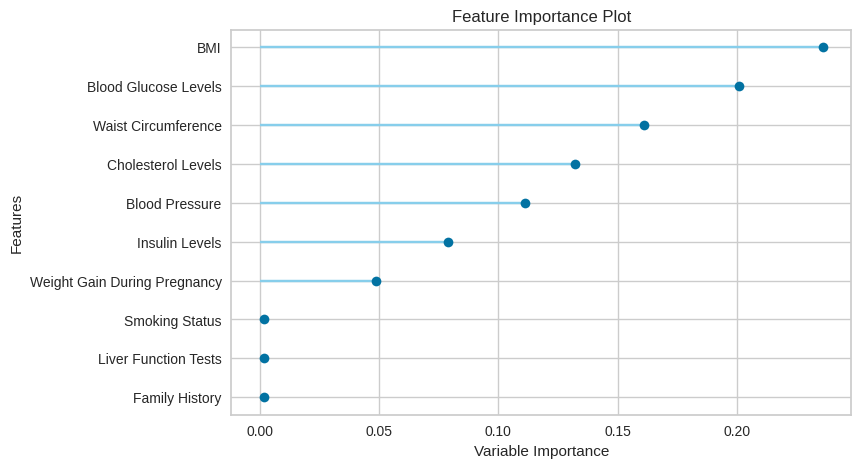

In [ ]:
plot_model(best_model, plot='confusion_matrix')
plot_model(best_model, plot='feature')


## 🔮 **Making Predictions**

Now I used the trained model to predict diabetes types for the actual test dataset (ts).

**Preparing Test Data and Predicting**

First, I needed to prepare the test set (ts) by dropping the 'ID' column. Then, I used predict_model to get the predictions.

In [ ]:
# Save ID column from test set
test_ids = ts["ID"]
ts_clean = ts.drop(columns=["ID"], errors='ignore')

# Predict on the test data
predictions = predict_model(model, data=ts_clean)

predictions.head(10)

,Genetic Markers,Family History,Insulin Levels,Blood Glucose Levels,Glucose Tolerance Test,BMI,Waist Circumference,Physical Activity,Dietary Habits,Smoking Status,...,Blood Pressure,Cholesterol Levels,Liver Function Tests,Previous Gestational Diabetes,Pregnancy History,Weight Gain During Pregnancy,Ethnicity,Socioeconomic Factors,prediction_label,prediction_score
0,Positive,No,19,103,Normal,25,32,Moderate,Healthy,Smoker,...,120,186,Abnormal,No,Complications,15,High Risk,High,Prediabetic,0.88
1,Positive,No,11,117,Normal,32,31,Low,Healthy,Smoker,...,126,216,Normal,Yes,Normal,16,Low Risk,Medium,Gestational Diabetes,0.97
2,Negative,No,10,118,Normal,26,39,Low,Unhealthy,Non-Smoker,...,123,214,Abnormal,No,Complications,18,Low Risk,High,Prediabetic,0.83
3,Positive,Yes,15,111,Normal,25,35,High,Unhealthy,Non-Smoker,...,116,220,Normal,No,Complications,20,High Risk,Medium,Prediabetic,0.94
4,Positive,Yes,13,101,Abnormal,27,30,Low,Unhealthy,Non-Smoker,...,127,175,Normal,No,Complications,17,High Risk,Low,Gestational Diabetes,0.89
5,Negative,Yes,11,134,Normal,21,30,Low,Unhealthy,Smoker,...,97,160,Normal,No,Normal,17,High Risk,High,Type 1 Diabetes,0.99
6,Positive,Yes,6,107,Normal,15,28,Low,Unhealthy,Smoker,...,118,167,Abnormal,No,Complications,15,High Risk,High,Type 1 Diabetes,1.00
7,Negative,Yes,26,101,Abnormal,24,39,High,Unhealthy,Non-Smoker,...,118,233,Abnormal,Yes,Complications,18,High Risk,Low,Prediabetic,0.91
8,Positive,No,9,135,Abnormal,18,30,Moderate,Healthy,Smoker,...,105,197,Normal,Yes,Normal,10,Low Risk,Low,Type 1 Diabetes,0.99
9,Negative,No,16,108,Normal,24,36,High,Healthy,Non-Smoker,...,112,234,Normal,No,Normal,22,Low Risk,Medium,Prediabetic,0.86


## **Saving the model for deployment**

In [ ]:
final_model = finalize_model(model)

save_model(final_model, 'classification_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Insulin Levels',
                                              'Blood Glucose Levels', 'BMI',
                                              'Waist Circumference',
                                              'Blood Pressure',
                                              'Cholesterol Levels',
                                              'Weight Gain During Pregnancy'],
                                     transformer...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, 

## **Create a submission File for sumitting to the contest**

In [ ]:
# Create submission
submission = pd.DataFrame({
    "id": test_ids,
    "diabetes_type": final_labels
})

submission_path = "/content/SheCures/submission_file.csv"
submission.to_csv(submission_path, index=False)